In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

## 1. –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏

In [20]:
X_train = np.load('motorica-skillfactory-internship-test-task-2023-12/X_train.npy')
print(X_train.shape)
y_train = pd.read_csv('motorica-skillfactory-internship-test-task-2023-12/y_train.csv')
print(y_train.shape)
X_test = np.load('motorica-skillfactory-internship-test-task-2023-12/X_test.npy')
print(X_test.shape)
y_sub = pd.read_csv('motorica-skillfactory-internship-test-task-2023-12/sample_submission.csv')
print(y_sub.shape)

(323, 40, 100)
(32300, 2)
(54, 40, 100)
(5400, 2)


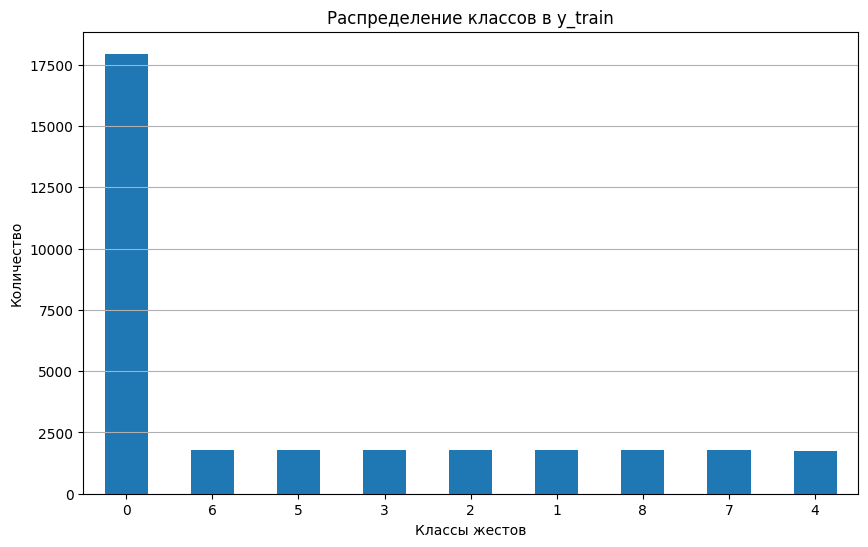

In [21]:
# –ü–æ–¥—Å—á–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤ y_train
class_distribution = y_train['class'].value_counts()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ y_train')
plt.xlabel('–ö–ª–∞—Å—Å—ã –∂–µ—Å—Ç–æ–≤')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- –ö–ª–∞—Å—Å 0 (–∫–æ–º–∞–Ω–¥–∞ "–∂–µ—Å—Ç open") –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –Ω–∞–¥ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏. –ï–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 17950, —á—Ç–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º —É –¥—Ä—É–≥–∏—Ö –∫–ª–∞—Å—Å–æ–≤.
- –û—Å—Ç–∞–ª—å–Ω—ã–µ –∫–ª–∞—Å—Å—ã (–æ—Ç 1 –¥–æ 8) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –≤ —Ä–∞–≤–Ω—ã—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞—Ö, –æ—Ç 1750 –¥–æ 1800 –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∫–∞–∂–¥—ã–π.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


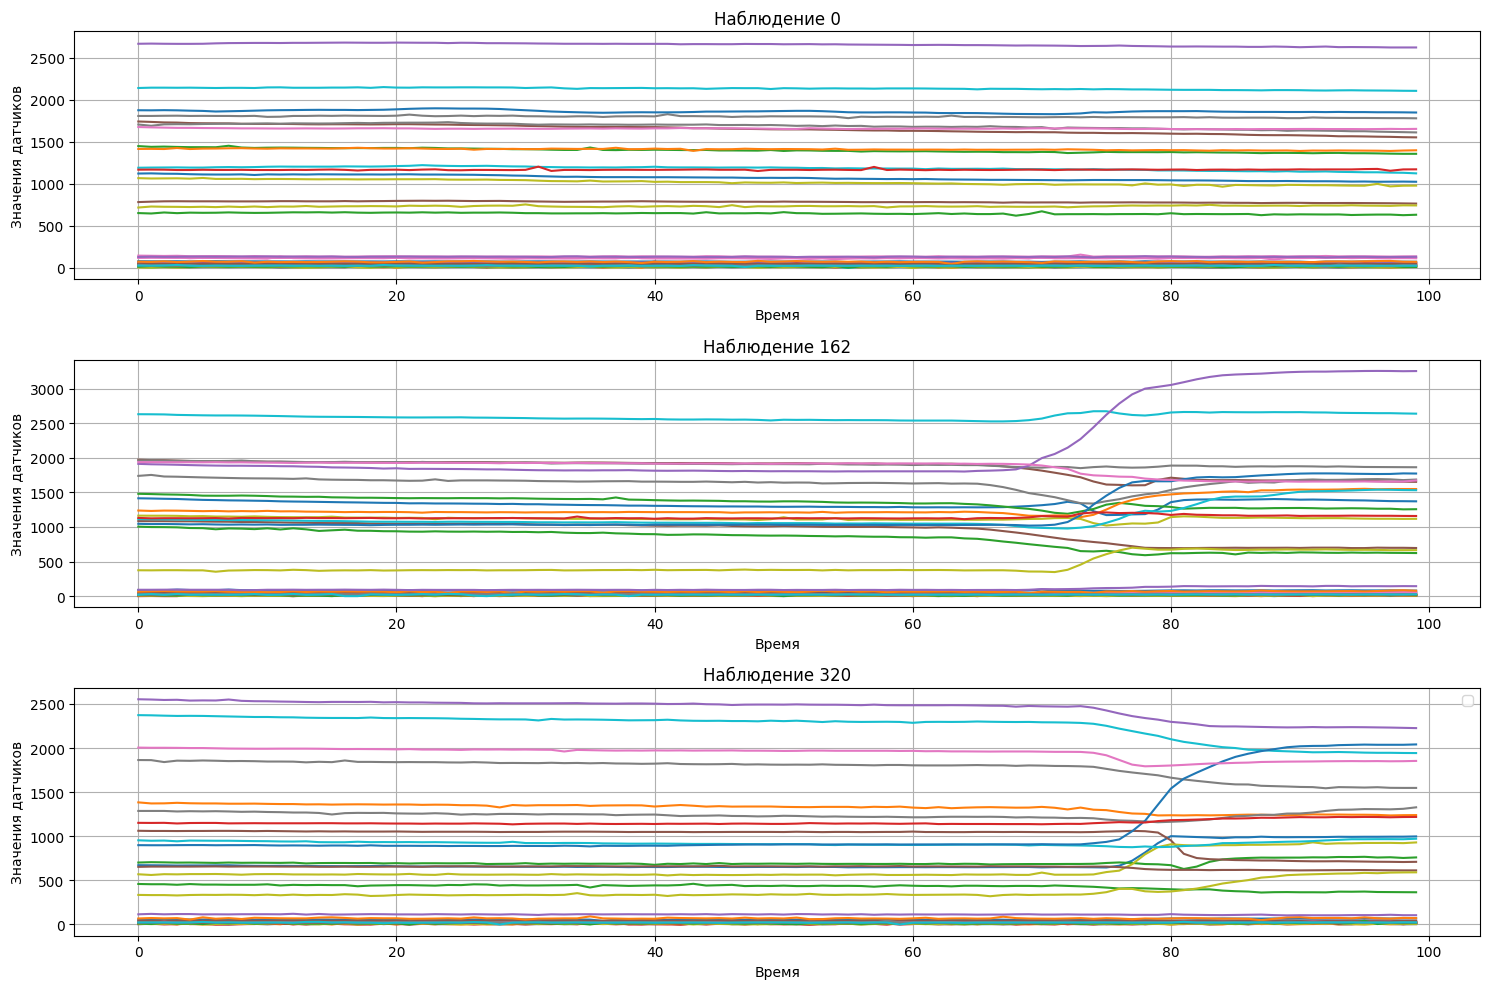

In [22]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –¥–∞—Ç—á–∏–∫–æ–≤ –¥–ª—è –≤—ã–±–æ—Ä–æ—á–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
sample_indices = [0, 162, 320]  # –í—ã–±–æ—Ä –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
num_sensors = X_train.shape[1]  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞—Ç—á–∏–∫–æ–≤

plt.figure(figsize=(15, 10))

for i, sample_index in enumerate(sample_indices, 1):
    plt.subplot(len(sample_indices), 1, i)
    for sensor in range(num_sensors):
        plt.plot(X_train[sample_index, sensor, :], label=f'–î–∞—Ç—á–∏–∫ {sensor}' if i == 1 else "")
    plt.title(f'–ù–∞–±–ª—é–¥–µ–Ω–∏–µ {sample_index}')
    plt.xlabel('–í—Ä–µ–º—è')
    plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏—è –¥–∞—Ç—á–∏–∫–æ–≤')
    plt.grid(True)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

–ù–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–∞—Ö –ø–æ–∫–∞–∑–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ —Å –¥–∞—Ç—á–∏–∫–æ–≤ –¥–ª—è —Ç—Ä–µ—Ö –≤—ã–±–æ—Ä–æ—á–Ω—ã—Ö –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏–∑ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏. –ö–∞–∂–¥—ã–π –≥—Ä–∞—Ñ–∏–∫ –æ—Ç–æ–±—Ä–∞–∂–∞–µ—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞–Ω–∏–π –≤—Å–µ—Ö 40 –¥–∞—Ç—á–∏–∫–æ–≤ –≤–æ –≤—Ä–µ–º–µ–Ω–∏ –¥–ª—è –æ–¥–Ω–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è. –≠—Ç–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø–æ–º–æ–≥–∞—é—Ç –Ω–∞–º —É–≤–∏–¥–µ—Ç—å, –∫–∞–∫ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –¥–∞—Ç—á–∏–∫–∏ —Ä–µ–∞–≥–∏—Ä—É—é—Ç –≤ —Ä–∞–∑–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã –≤—Ä–µ–º–µ–Ω–∏, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ–º —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∂–µ—Å—Ç–æ–≤.

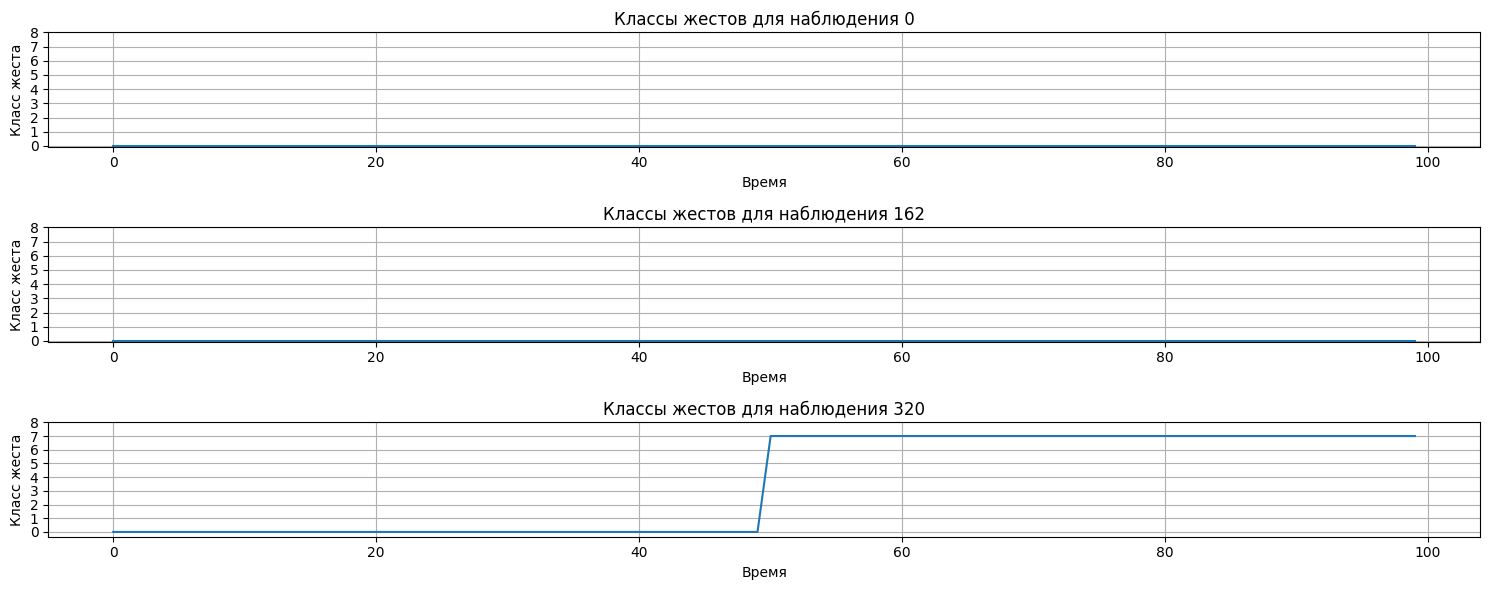

In [23]:
y_train_plot = y_train.copy()
y_train_plot[['sample', 'timestep']] = y_train_plot['sample-timestep'].str.split('-', expand=True).astype(int)
y_train_plot = y_train_plot.drop(columns=['sample-timestep'])
y_train_reshaped = y_train_plot.pivot(index='sample', columns='timestep', values='class').values

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Å–æ–≤ –∂–µ—Å—Ç–æ–≤ –¥–ª—è —Ç–µ—Ö –∂–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π
plt.figure(figsize=(15, 6))

for i, sample_index in enumerate(sample_indices, 1):
    plt.subplot(len(sample_indices), 1, i)
    plt.plot(y_train_reshaped[sample_index, :], label=f'–ù–∞–±–ª—é–¥–µ–Ω–∏–µ {sample_index}')
    plt.title(f'–ö–ª–∞—Å—Å—ã –∂–µ—Å—Ç–æ–≤ –¥–ª—è –Ω–∞–±–ª—é–¥–µ–Ω–∏—è {sample_index}')
    plt.xlabel('–í—Ä–µ–º—è')
    plt.ylabel('–ö–ª–∞—Å—Å –∂–µ—Å—Ç–∞')
    plt.yticks(range(9))  # 9 –∫–ª–∞—Å—Å–æ–≤ –∂–µ—Å—Ç–æ–≤
    plt.grid(True)

plt.tight_layout()
plt.show()

–ù–µ—Å–∫–æ–ª—å–∫–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏–∑ –∞–Ω–∞–ª–∏–∑–∞:

–í –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª—É—á–∞—è—Ö –≤–∏–¥–Ω—ã —á—ë—Ç–∫–∏–µ –ø–µ—Ä–µ—Ö–æ–¥—ã –º–µ–∂–¥—É —Ä–∞–∑–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏ –∂–µ—Å—Ç–æ–≤, —á—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –º–æ–º–µ–Ω—Ç—ã, –∫–æ–≥–¥–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –º–µ–Ω—è–µ—Ç –∂–µ—Å—Ç.
–ù–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø–µ—Ä–∏–æ–¥—ã —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç–∏, –≥–¥–µ –∫–ª–∞—Å—Å –∂–µ—Å—Ç–∞ –Ω–µ –º–µ–Ω—è–µ—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏.

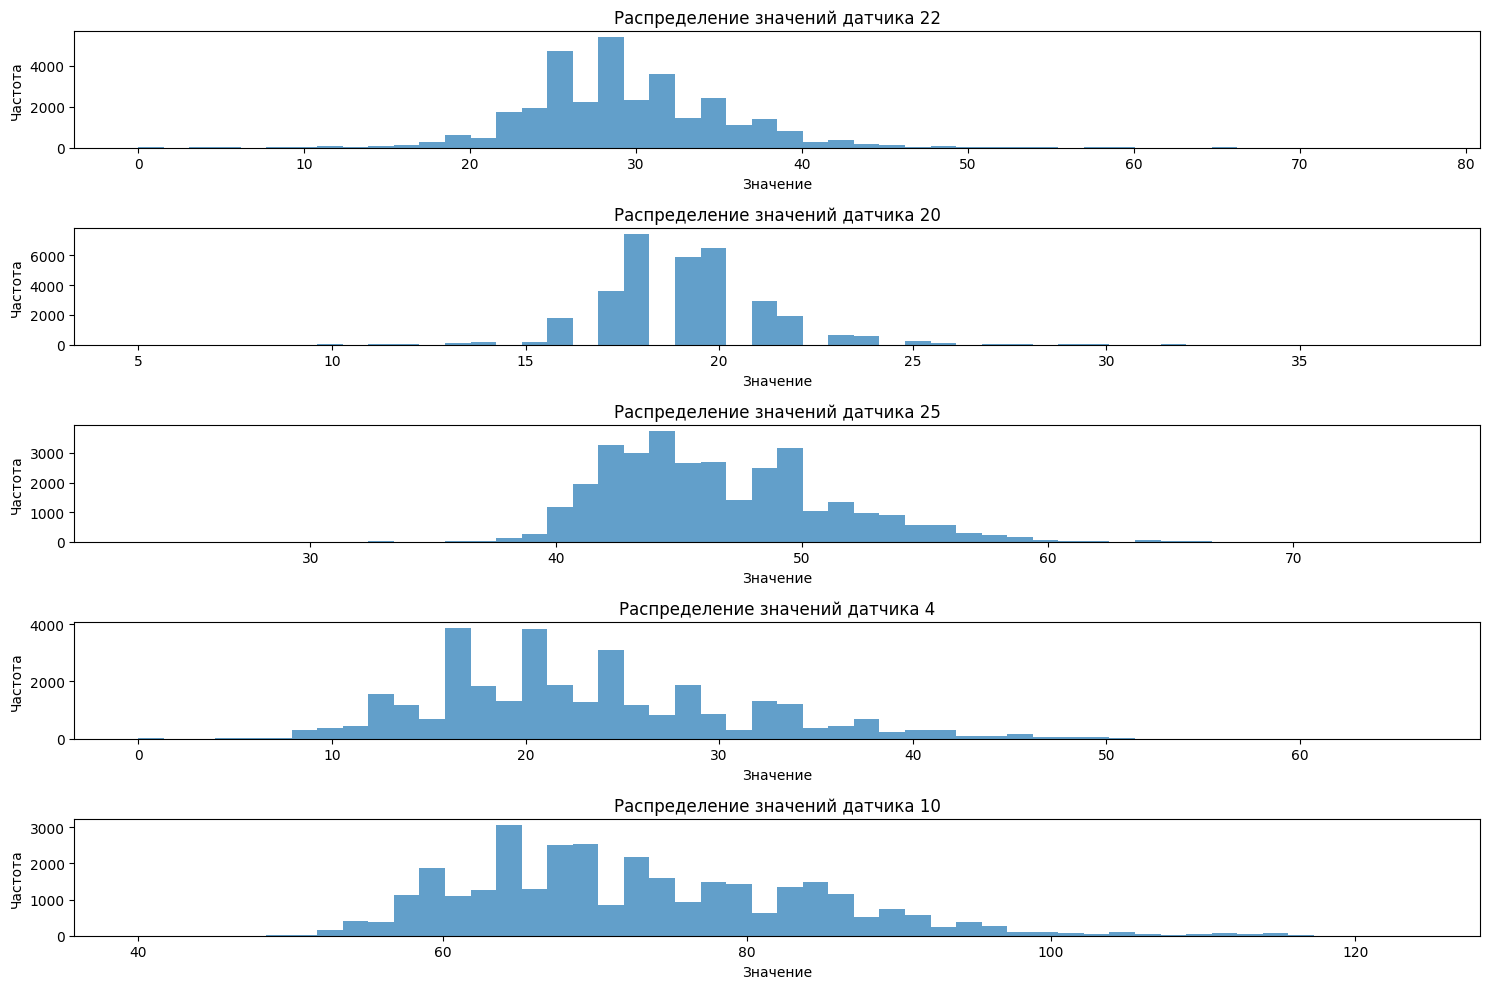

In [16]:
np.random.seed(0)  # –î–ª—è –≤–æ—Å–ø—Ä–æ–∏–∑–≤–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
num_sensors = 5  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞—Ç—á–∏–∫–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
random_sensors = np.random.choice(X_train.shape[1], num_sensors, replace=False)

plt.figure(figsize=(15, 10))
for i, sensor in enumerate(random_sensors, 1):
    plt.subplot(num_sensors, 1, i)
    plt.hist(X_train[:, sensor, :].flatten(), bins=50, alpha=0.7)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–∞—Ç—á–∏–∫–∞ {sensor}')
    plt.xlabel('–ó–Ω–∞—á–µ–Ω–∏–µ')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

plt.tight_layout()
plt.show()

–ù–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞—Ö –≤—ã—à–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞—Ç—á–∏–∫–æ–≤. –ò–∑ –≤–∏–∑—É–∞–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–µ –≤—ã–≥–ª—è–¥—è—Ç –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ ‚Äî –æ–Ω–∏ –ª–∏–±–æ —Å–∫–æ—à–µ–Ω—ã, –ª–∏–±–æ –º–Ω–æ–≥–æ–º–æ–¥–∞–ª—å–Ω—ã.

In [18]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —Ç–µ—Å—Ç–∞ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ –¥–∞–Ω–Ω—ã—Ö –¥–∞—Ç—á–∏–∫–∞
def test_normality(data, sample_size=500, alpha=0.05):
    if len(data) > sample_size:  # –ï—Å–ª–∏ –¥–∞–Ω–Ω—ã—Ö —Å–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ, –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–¥–≤—ã–±–æ—Ä–∫—É
        data = np.random.choice(data, size=sample_size, replace=False)
    stat, p = shapiro(data)
    return '–ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ' if p > alpha else '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ'

# –ü—Ä–æ–≤–µ–¥–µ–º —Ç–µ—Å—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–∞—Ç—á–∏–∫–∞
normality_test_results = [test_normality(X_train[:, sensor, :].flatten()) for sensor in range(X_train.shape[1])]

# –í—ã–≤–µ–¥–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –ø–µ—Ä–≤—ã—Ö 10 –¥–∞—Ç—á–∏–∫–æ–≤ –¥–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –º–µ—Å—Ç–∞
normality_test_results[:10]

['–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ',
 '–ù–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ']

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –∏–∑ –ø–µ—Ä–≤—ã—Ö 10 –¥–∞—Ç—á–∏–∫–æ–≤ –Ω–µ —Å–ª–µ–¥—É—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é. –≠—Ç–æ —Å–æ–≥–ª–∞—Å—É–µ—Ç—Å—è —Å –≤–∏–∑—É–∞–ª—å–Ω—ã–º –∞–Ω–∞–ª–∏–∑–æ–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–Ω—ã–º –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç–æ–¥—ã, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ –∫ –º–∞—Å—à—Ç–∞–±—É –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫–∏–µ –∫–∞–∫ –Ω–µ–π—Ä–æ–Ω–Ω—ã–µ —Å–µ—Ç–∏.

## 2. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç—Ä–µ—Ö–º–µ—Ä–Ω—ã—Ö –º–∞—Å—Å–∏–≤–æ–≤ –¥–∞–Ω–Ω—ã—Ö –≤ –ø–ª–æ—Å–∫–∏–π —Ñ–æ—Ä–º–∞—Ç DataFrame. –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ –º–Ω–æ–≥–∏–µ –º–µ—Ç–æ–¥—ã –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è —Ç—Ä–µ–±—É—é—Ç –¥–≤—É–º–µ—Ä–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

In [3]:
def transform_to_df(np_3D):
    samples = []
        
    for X in np_3D:
        timesteps = np.arange(X.shape[1])
        X_transformed = np.column_stack((X.T, timesteps))
        samples.append(X_transformed)
    
    return np.row_stack(samples)

In [4]:
X_train_df = pd.DataFrame(transform_to_df(X_train), index=y_train['sample-timestep'])
X_test_df = pd.DataFrame(transform_to_df(X_test), index=y_sub['sample-timestep'])

display(X_train_df.head())
display(X_test_df.head())

0     1       2     3     4       5      6     7   \
sample-timestep                                                          
0-0              1123.0  10.0  1450.0  64.0  34.0  1743.0  145.0  12.0   
0-1              1125.0   7.0  1441.0  66.0  33.0  1738.0  143.0  17.0   
0-2              1121.0  17.0  1444.0  60.0  32.0  1732.0  141.0  10.0   
0-3              1120.0  10.0  1440.0  59.0  32.0  1730.0  143.0   6.0   
0-4              1115.0  16.0  1437.0  51.0  30.0  1724.0  138.0   4.0   

                     8     9   ...    31    32      33     34    35      36  \
sample-timestep                ...                                            
0-0              1068.0  14.0  ...  73.0  13.0  1169.0  129.0  29.0  1677.0   
0-1              1064.0   0.0  ...  70.0  20.0  1170.0  132.0  28.0  1673.0   
0-2              1065.0  14.0  ...  77.0  14.0  1169.0  130.0  30.0  1670.0   
0-3              1066.0  13.0  ...  68.0  13.0  1165.0  131.0  29.0  1667.0   
0-4              1062.0  12.0  ...  73.0   9.0  1165.0  133.0  29.0  1667.0   

                   37     38    39   40  
sample-timestep                          
0-0              36.0  718.0  26.0  0.0  
0-1              28.0  730.0  25.0  1.0  
0-2              29.0  727.0  27.0  2.0  
0-3              24.0  726.0  34.0  3.0  
0-4              32.0  724.0  24.0  4.0  

[5 rows x 41 columns]

0     1       2     3     4       5     6     7       8   \
sample-timestep                                                                 
323-0            1681.0   4.0  1834.0  33.0  26.0  2254.0  43.0   0.0  1376.0   
323-1            1679.0  17.0  1826.0  36.0  26.0  2250.0  43.0   5.0  1369.0   
323-2            1673.0   4.0  1827.0  35.0  25.0  2251.0  42.0  10.0  1371.0   
323-3            1669.0  10.0  1832.0  33.0  30.0  2251.0  38.0   1.0  1369.0   
323-4            1670.0   3.0  1831.0  36.0  28.0  2249.0  40.0   8.0  1368.0   

                   9   ...    31    32      33     34    35      36    37  \
sample-timestep        ...                                                  
323-0            27.0  ...  82.0  16.0  1204.0  108.0  25.0  1685.0  27.0   
323-1            28.0  ...  71.0  19.0  1186.0  108.0  26.0  1689.0  25.0   
323-2            19.0  ...  72.0  15.0  1204.0  106.0  25.0  1690.0  32.0   
323-3            18.0  ...  66.0  14.0  1203.0  107.0  27.0  1690.0  16.0   
323-4            18.0  ...  76.0  30.0  1207.0  107.0  26.0  1691.0  29.0   

                    38    39   40  
sample-timestep                    
323-0            386.0  25.0  0.0  
323-1            388.0  27.0  1.0  
323-2            388.0  27.0  2.0  
323-3            390.0  27.0  3.0  
323-4            391.0   4.0  4.0  

[5 rows x 41 columns]

–¢–∞–∫ –∫–∞–∫ –∏–∑ –∞–Ω–∞–ª–∏–∑–∞ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å –º—ã –≤—ã—è—Å–Ω–∏–ª–∏, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –Ω–µ —Ä–∞–ø—Å–ø—Ä–¥–µ–ª–µ–Ω—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ, —Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –º–∞—Å—à–∞—Ç–∏–±—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

In [5]:
scaler = StandardScaler()
scaler.fit(X_train_df)

X_train_scaled = scaler.transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

y_train_class = y_train['class']

## 3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

–°–æ–∑–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ —Å –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–µ–π –∏ –≤—ã–±–æ—Ä–∞ –ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏:

In [6]:
def cv_metrics(model, kfold=KFold()):
    
    cv_metrics = cv(
        estimator=model, #–º–æ–¥–µ–ª—å
        X=X_train_scaled, #–º–∞—Ç—Ä–∏—Ü–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π X
        y=y_train_class, #–≤–µ–∫—Ç–æ—Ä –æ—Ç–≤–µ—Ç–æ–≤ y
        scoring='f1_weighted', #–º–µ—Ç—Ä–∏–∫–∞
        cv = kfold,
        return_train_score=True #–ø–æ–¥—Å—á—ë—Ç –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö —Ñ–æ–ª–¥–∞—Ö
    )
    
    print('Train k-fold mean f1_weighted: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
    print('Valid k-fold mean f1_weighted: {:.2f}'.format(np.mean(cv_metrics['test_score'])))
    
def best_model_param(model, param_grid):
    
    cv_metrics(model)
    
    grid_search = GridSearchCV(
        estimator= model, 
        param_grid=param_grid, 
        n_jobs = -1
    )
    
    grid_search.fit(X_train_scaled, y_train_class)
    
    print(f'\nBest model has such params: {grid_search.best_params_}\n')
    
    cv_metrics(grid_search.best_estimator_)
    
    return grid_search.best_estimator_

–ú–æ—è —Ç–∞–∫—Ç–∏–∫–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ø—Ä–æ—Å—Ç–∞—è - –æ–±—É—á–∞—Ç—å –º–æ–¥–µ–ª–∏, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ —è —Ä–∞–Ω–µ–µ —Ä–∞–±–æ—Ç–∞–ª–∞ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è, –ø–µ—Ä–µ–±–∏—Ä–∞—Ç—å –∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ –ø–æ—Ç–æ–º —Å–∞–±–º–∏—Ç–∏—Ç—å –∏—Ö –≤ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏–µ. –ü–æ—ç—Ç–æ–º—É –Ω–∞—á–Ω–µ–º —Å –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ LogisticRegression

### LogisticRegression

In [7]:
#–°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å
log_reg = LogisticRegression(
    random_state=42, max_iter=1000
)

log_reg_param = {'multi_class': ['ovr', 'multinomial'], 
                'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}

log_reg_best = best_model_param(log_reg, log_reg_param)

Train k-fold mean f1_weighted: 0.82
Valid k-fold mean f1_weighted: 0.77

Best model has such params: {'multi_class': 'ovr', 'solver': 'lbfgs'}

Train k-fold mean f1_weighted: 0.82
Valid k-fold mean f1_weighted: 0.79


### SGDCClassifier

In [89]:
sgd_clf = SGDClassifier(random_state=42)

sgd_clf_param = {'alpha': [0.01, 0.1, 1], 
              'learning_rate': ['constant', 'optimal', 'adaptive'], 
              'eta0': [1, 10, 50, 100]}

sgd_clf_best = best_model_param(sgd_clf, sgd_clf_param) 

Train k-fold mean f1_weighted: 0.83
Valid k-fold mean f1_weighted: 0.81

Best model has such params: {'alpha': 0.01, 'eta0': 10, 'learning_rate': 'adaptive'}

Train k-fold mean f1_weighted: 0.82
Valid k-fold mean f1_weighted: 0.81


### DecisionTreeClassifier

In [8]:
#–°–æ–∑–¥–∞—ë–º –æ–±—ä–µ–∫—Ç –∫–ª–∞—Å—Å–∞ DecisionTreeClassifier
dt_clf = tree.DecisionTreeClassifier(
    random_state=42
)

dt_clf_param = {'criterion': ['gini', 'entropy'], 
                'max_depth': range(1,7), 
                'min_samples_leaf': range(1,5)}

df_clf_best = best_model_param(dt_clf, dt_clf_param)

Train k-fold mean f1_weighted: 1.00
Valid k-fold mean f1_weighted: 0.78

Best model has such params: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4}

Train k-fold mean f1_weighted: 0.83
Valid k-fold mean f1_weighted: 0.77


### RandomForestClassifier

In [9]:
rf_clf = ensemble.RandomForestClassifier(
    random_state=42
)

rf_clf_param = {'n_estimators':[100, 300, 500],
    'max_depth': range(1,8),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': range(1,5),
    'max_features': ['auto', 'sqrt', 'log2']}

rf_clf_best = best_model_param(rf_clf, rf_clf_param)

Train k-fold mean f1_weighted: 1.00
Valid k-fold mean f1_weighted: 0.85

Best model has such params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}

Train k-fold mean f1_weighted: 0.84
Valid k-fold mean f1_weighted: 0.78


### GradientBoostingClassifier

In [43]:
gb_clf = ensemble.GradientBoostingClassifier(
    random_state=42
)

gb_clf_param = {'learning_rate': [0.01, 0.1], #—Ç–µ–º–ø –æ–±—É—á–µ–Ω–∏—è
    'n_estimators': [100,250],
    'max_depth': range(2,4,6)}

gb_clf_best = best_model_param(gb_clf, gb_clf_param)

Train k-fold mean f1_weighted: 0.98
Valid k-fold mean f1_weighted: 0.84

Best model has such params: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}

Train k-fold mean f1_weighted: 0.97
Valid k-fold mean f1_weighted: 0.81


### MLPClassifier

In [77]:
from sklearn.neural_network import MLPClassifier  # –º–Ω–æ–≥–æ—Å–ª–æ–π–Ω—ã–π –ø–µ—Ä—Å–µ–ø—Ç—Ä–æ–Ω (–ø—Ä–æ—Å—Ç–æ –º–Ω–æ–≥–æ –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–ª–æ–µ–≤)

mlp_clf = MLPClassifier(max_iter=10, random_state=42)

mlp_clf_param = {
    'max_iter': [10,20,30],
    'activation': ['relu', 'identity', 'logistic', 'tanh'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

mlp_clf_best = best_model_param(mlp_clf, mlp_clf_param)

Train k-fold mean f1_weighted: 0.84
Valid k-fold mean f1_weighted: 0.79


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_mult


Best model has such params: {'activation': 'tanh', 'learning_rate': 'constant', 'max_iter': 30, 'solver': 'adam'}

Train k-fold mean f1_weighted: 0.96
Valid k-fold mean f1_weighted: 0.86


## 4. –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ

–í –ø—Ä–æ—Ü–µ—Å—Å–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è —è –≤—ã–±—Ä–∞–ª–∞ —Ç—Ä–∏ –º–æ–¥–µ–ª–∏: LogisticREgression, MLP, GradientBoosting –∏ SGDClassifier, –∏ –ø–æ–æ—á–µ—Ä–µ–¥–Ω–æ –æ—Ç–ø—Ä–∞–≤–ª—è–ª–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –°–∞–º—ã–π –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å SGDClassifier, –∏ —è –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞—é, —á—Ç–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã—Ö –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –Ω–∞–±–æ—Ä–∞—Ö –¥–∞–Ω–Ω—ã—Ö –∏–º–µ—é—Ç –Ω–∞–∏–º–µ–Ω—å—à–µ–µ —Ä–∞–∑–ª–∏—á–∏–µ, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—Ç–∞–±–∏–ª—å–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏.

In [86]:
y_pred = sgd_clf_best.predict(X_test_scaled)
y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [90]:
indexes = pd.Series(X_test_df.index)
y = pd.Series(y_pred)
sub = pd.concat([indexes, y], axis=1)
sub.columns = ['sample-timestep', 'class']
sub

sample-timestep  class
0              323-0      4
1              323-1      4
2              323-2      4
3              323-3      4
4              323-4      4
...              ...    ...
5395          376-95      4
5396          376-96      4
5397          376-97      4
5398          376-98      4
5399          376-99      4

[5400 rows x 2 columns]

In [91]:
sub.to_csv('y_test_prediction_sgd.csv', index=False)

P.S. –í–æ–æ–±—â–µ —è –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –ø–æ—Ç—Ä–∞—Ç–∏–ª–∞ –Ω–∞ —Ç–æ, —á—Ç–æ–±—ã –æ–±—É—á–∏—Ç—å –Ω–µ–π—Ä–æ–Ω—É—é —Å–µ—Ç—å **LSTM**, –ø–æ—Ç–æ–º—É —á—Ç–æ –ø–æ –æ–ø–∏—Å–∞–Ω–∏—é –æ–Ω–∞ —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏, –Ω–æ –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, —É –º–µ–Ω—è –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å, –Ω–æ –±—É–¥—É —Ä–∞–¥–∞, –µ—Å–ª–∏ –∫—Ç–æ-–Ω–∏–±—É–¥—å –º–Ω–µ –ø–æ–º–æ–∂–µ—Ç —Å —ç—Ç–∏–º —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è üôÇ